In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

In [2]:
train_data = pd.read_csv('../../with_book/data_sets/titanic_train.csv')
test_data = pd.read_csv('../../with_book/data_sets/titanic_test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [13]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train_data['train'] = 1
test_data['train'] = 0
data = pd.concat([train_data, test_data], ignore_index=True)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
train,1309.0,0.680672,0.466394,0.00,0.0000,1.0000,1.000,1.0000


In [18]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train             0
dtype: int64

In [19]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [20]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
train             0
dtype: int64

In [22]:
data['Cabin'].nunique()

186

In [24]:
data['Pclass'].nunique()

3

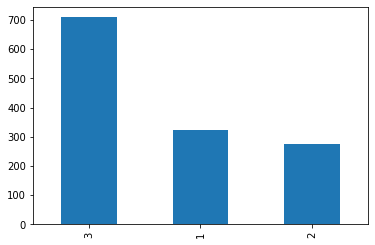

In [25]:
data['Pclass'].value_counts().plot.bar()

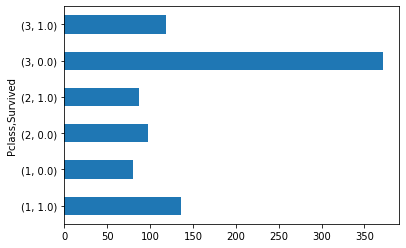

In [29]:
data.groupby(['Pclass'])['Survived'].value_counts().plot(kind='barh')

In [30]:
category_feature = ['Sex', 'Pclass', 'Cabin', 'Embarked', 'SibSp', 'Parch']
number_feature = ['Age', 'Fare']

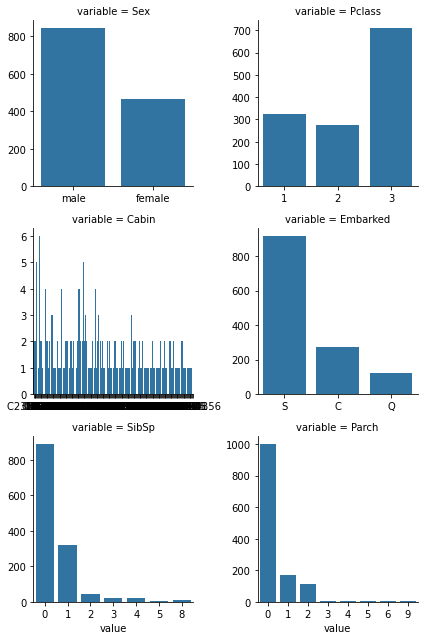

In [36]:
##类别特征分析
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

f = pd.melt(data, id_vars=['Survived'], value_vars=category_feature)

g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)

g = g.map(sns.countplot, 'value')

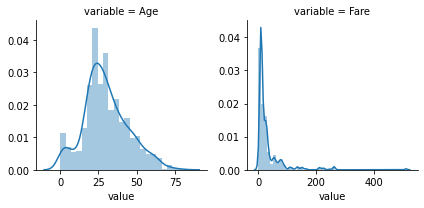

In [37]:
f = pd.melt(data, value_vars=number_feature)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [38]:
def log_transform(x):
    x = np.log(x + 1)
    return x
log_fare = data.Fare.apply(log_transform)

In [39]:
log_fare

0       2.110213
1       4.280593
2       2.188856
3       3.990834
4       2.202765
          ...   
1304    2.202765
1305    4.699571
1306    2.110213
1307    2.202765
1308    3.150952
Name: Fare, Length: 1309, dtype: float64

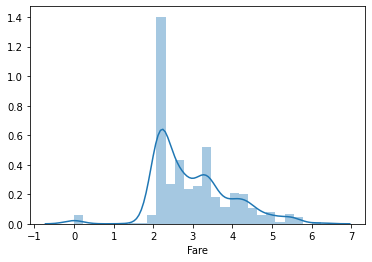

In [40]:
sns.distplot(log_fare)

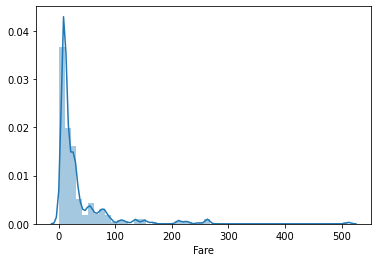

In [41]:
sns.distplot(data['Fare'])

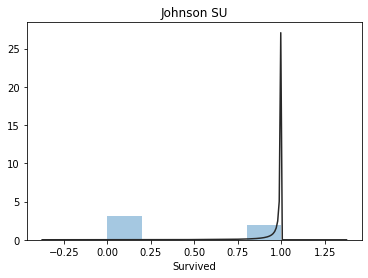

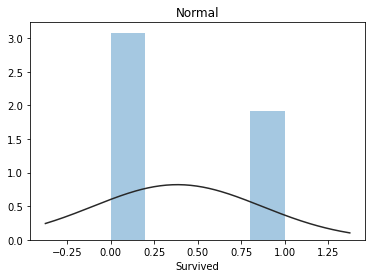

In [42]:
import scipy.stats as st
y = train_data['Survived']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

In [43]:
train_data['Cabin'] = train_data.Cabin.fillna('U0')
train_data['Embarked'].fillna(train_data.Embarked.mode()[0], inplace=True)

In [49]:
from sklearn.ensemble import RandomForestRegressor

age_df = train_data[['Age', 'Survived', 'Fare', 'Parch', 'SibSp', 'Pclass']]
age_notnull_df = age_df.loc[(train_data['Age'].notnull())]
age_isnull_df = age_df.loc[(train_data['Age'].isnull())]

X = age_notnull_df.drop(['Age'], axis=1)
y = age_notnull_df['Age']

RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X, y)

predict = RFR.predict(age_isnull_df.drop(['Age'], axis=1))

In [47]:
age_isnull_df.isnull().sum()

Age         177
Survived      0
Fare          0
Parch         0
SibSp         0
Pclass        0
dtype: int64

In [50]:
predict

array([23.72395813, 33.52775658, 18.63848532, 35.01746479, 22.57585942,
       27.87074214, 36.53404   , 22.14054325, 16.82868889, 27.87074214,
       31.64694379, 33.89601667, 22.14054325, 23.45465   , 40.77215   ,
       39.34072698, 14.95535929, 27.87074214, 31.64694379, 23.78359286,
       31.64694379, 31.64694379, 27.87074214, 22.80467902, 30.40800006,
       31.64694379, 40.43510093, 14.73835667, 30.89463571, 30.6683052 ,
       25.46138925, 11.14194955, 25.30410476, 58.38443061,  7.44563185,
       11.14194955, 32.15354643, 58.46691667, 26.60116667, 40.43510093,
       22.14054325, 11.14194955, 34.12198775, 27.87074214,  7.44563185,
       35.77308333, 23.0332002 , 26.60116667, 30.6683052 , 34.19440952,
       40.43510093, 40.43510093, 52.97325   , 22.14054325, 35.41340104,
       58.8779068 , 39.34072698, 37.21466468, 22.14054325, 25.95364549,
       32.40893445, 31.64694379, 29.04625   , 11.14194955, 25.95364549,
       32.01340357, 27.87074214, 26.52999524, 62.13833333, 35.01

In [52]:
train_data.loc[train_data['Age'].isnull(), ['Age']] = predict

In [53]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
train          0
dtype: int64

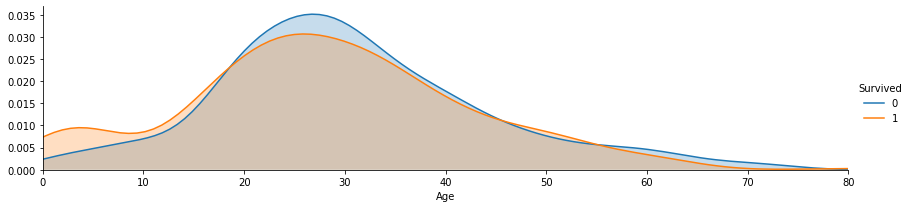

In [54]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

In [56]:
bins = [0, 12, 18, 65, 100]
train_data['Age_bins'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby(['Age_bins'])['Survived'].mean()
by_age

Age_bins
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

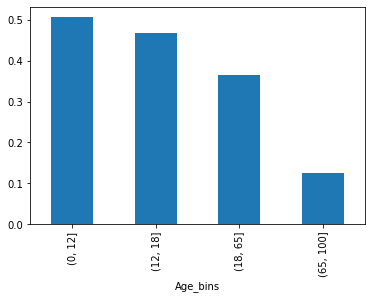

In [57]:
by_age.plot.bar()

In [58]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [59]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train            0
Age_bins       418
dtype: int64

In [63]:
data.Age = data.Age.fillna(data.Age.mean())

In [64]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train            0
Age_bins       418
dtype: int64

In [65]:
data['Age_bins'] = pd.cut(data['Age'], bins=bins)
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train            0
Age_bins         0
dtype: int64

In [66]:
data.Cabin.fillna('U0', inplace=True)

In [67]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
train            0
Age_bins         0
dtype: int64

In [68]:
data.Fare.fillna(data.Fare.mode()[0], inplace=True)

In [69]:
data = pd.get_dummies(data, columns=['Age_bins', 'Embarked', 'Sex'])

In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,train,"Age_bins_(0, 12]","Age_bins_(12, 18]","Age_bins_(18, 65]","Age_bins_(65, 100]",Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,U0,1,0,0,1,0,0,0,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,U0,1,0,0,1,0,0,0,1,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1,1,0
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,U0,1,0,0,1,0,0,0,1,0,1


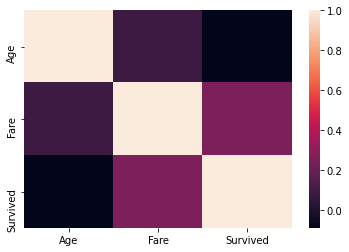

In [72]:
number_feature.append('Survived')
corrnumber = train_data[number_feature]
correlation = corrnumber.corr()
sns.heatmap(correlation)

In [73]:
data.isnull().sum()

PassengerId             0
Survived              418
Pclass                  0
Name                    0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                   0
train                   0
Age_bins_(0, 12]        0
Age_bins_(12, 18]       0
Age_bins_(18, 65]       0
Age_bins_(65, 100]      0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Sex_female              0
Sex_male                0
dtype: int64

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [76]:
data_feature = data.drop(['Name', 'Age', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

In [77]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
fare_minmax = min_max.fit_transform(data_feature[['Fare']])

In [78]:
fare_minmax

array([[0.01415106],
       [0.13913574],
       [0.01546857],
       ...,
       [0.01415106],
       [0.01571255],
       [0.0436405 ]])

In [79]:
data_feature['Fare'] = fare_minmax

In [80]:
train_feature = data_feature[data_feature['train'] == 1]
test_feature = data_feature[data_feature['train'] == 0]

In [84]:
from sklearn.metrics import mean_absolute_error, make_scorer
train_X = train_feature.drop(['Survived'], axis=1)
train_y = train_feature['Survived']
models = [
        RandomForestClassifier(),
        AdaBoostClassifier(),
        Lasso(), Ridge(),LinearRegression(),
        LogisticRegression()
        ]
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y, verbose=0, cv=10, scoring=make_scorer(mean_absolute_error))
    
    result[model_name] = scores
    
    print(model_name + ' is finished')

RandomForestClassifier is finished
AdaBoostClassifier is finished
Lasso is finished
Ridge is finished
LinearRegression is finished
LogisticRegression is finished


In [81]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, ##要搜索的模型
                       params, ##要尝试的参数
                       error_score=0.)  ##如果报错，结果是0
    grid.fit(X, y) #拟合模型和参数
    # 性能指标
    print('best accuracy: {}'.format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print('best parameters:{}'.format(grid.best_params_))
    # 拟合的平均时间(秒)
    print('average time to fit (s): {}'.format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    ## 预测的平均时间
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [85]:
result = pd.DataFrame(result)
result.index = ['cv' + str(i) for i in range(1, 11)]
result

,RandomForestClassifier,AdaBoostClassifier,Lasso,Ridge,LinearRegression,LogisticRegression
cv1,0.211111,0.255556,0.483770,0.303157,0.302938,0.211111
cv2,0.202247,0.224719,0.445768,0.296575,0.295768,0.224719
cv3,0.258427,0.224719,0.472639,0.310772,0.311127,0.235955
cv4,0.168539,0.157303,0.501457,0.290088,0.289579,0.191011
cv5,0.123596,0.191011,0.479826,0.302975,0.303713,0.224719
cv6,0.168539,0.191011,0.468127,0.280770,0.280490,0.235955
cv7,0.179775,0.179775,0.484897,0.305870,0.306260,0.213483
cv8,0.258427,0.191011,0.470355,0.308154,0.308777,0.235955
cv9,0.134831,0.202247,0.463840,0.256840,0.255843,0.168539
cv10,0.157303,0.179775,0.470355,0.279772,0.279828,0.179775


In [87]:
params = {'n_estimators': range(100, 1100, 100), 'max_depth': [3,5,10,15,20,40, 55]}
get_best_model_and_accuracy(RandomForestClassifier(), params, train_X, train_y)

best accuracy: 0.8215491808423827
best parameters:{'max_depth': 5, 'n_estimators': 800}
average time to fit (s): 0.757
Average Time to Score (s):0.058


In [88]:
RFR = RandomForestClassifier(n_estimators=800, n_jobs=-1, max_depth=5)
model = RFR.fit(train_X, train_y)

In [90]:
pred_feature = test_feature.drop(['Survived'], axis=1)

In [91]:
predict = model.predict(pred_feature)

In [92]:
predict

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [101]:
sub = pd.DataFrame()
sub['PassengerId'] = test_data['PassengerId']
sub['Survived'] = predict.astype('int')
sub.to_csv('./titanic_sub.csv', index=False)

In [94]:
sub.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [95]:
test_feature.head()

,Survived,Pclass,SibSp,Parch,Fare,train,"Age_bins_(0, 12]","Age_bins_(12, 18]","Age_bins_(18, 65]","Age_bins_(65, 100]",Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
891,NaN,3,0,0,0.015282,0,0,0,1,0,0,1,0,0,1
892,NaN,3,1,0,0.013663,0,0,0,1,0,0,0,1,1,0
893,NaN,2,0,0,0.018909,0,0,0,1,0,0,1,0,0,1
894,NaN,3,0,0,0.016908,0,0,0,1,0,0,0,1,0,1
895,NaN,3,1,1,0.023984,0,0,0,1,0,0,0,1,1,0


In [98]:
test_feature.index.nunique()

418

In [97]:
data.index

RangeIndex(start=0, stop=1309, step=1)

In [99]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [100]:
test_data.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [115]:
train_X = train_feature.drop(['Survived'], axis=1)
train_X = train_X.rename(columns={'Age_bins_(0, 12]':'Age12','Age_bins_(12, 18]': 'Age18','Age_bins_(18, 65]':'Age65', 'Age_bins_(65, 100]': 'Age100'})
train_y = train_feature['Survived']
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=.3)

In [116]:
import xgboost
model = xgboost.XGBClassifier(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42
    
)

model.fit(
    train_X, 
    trian_y,
    eval_metric='auc',
    eval_set=[(train_X, train_y), (valid_X, valid_y)],
    verbose=True,
    early_stopping_rounds=10
)


[0]	validation_0-auc:0.50000	validation_1-auc:0.50000
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000
[8]	validation_0-auc:0.50000	validation_1-auc:0.50000
[9]	validation_0-auc:0.50000	validation_1-auc:0.50000
[10]	validation_0-auc:0.50000	validation_1-auc:0.50000
Stopping. Best iteration:
[0]	validation_0-auc:0.50000	validation_1-auc:0.50000



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=300, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
train_X.rename(columns={'Age_bins_(0, 12]':'Age12','Age_bins_(12, 18]': 'Age18','Age_bins_(18, 65]':'Age65', 'Age_bins_(65, 100]': 'Age100'})

,Pclass,SibSp,Parch,Fare,train,Age12,Age18,Age65,Age100,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
887,1,0,0,0.058556,1,0,0,1,0,0,0,1,1,0
606,3,0,0,0.015412,1,0,0,1,0,0,0,1,0,1
650,3,0,0,0.015412,1,0,0,1,0,0,0,1,0,1
369,1,0,0,0.135265,1,0,0,1,0,1,0,0,1,0
339,1,0,0,0.069291,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,3,0,0,0.015176,1,0,1,0,0,0,0,1,0,1
483,3,0,0,0.018714,1,0,0,1,0,0,0,1,1,0
302,3,0,0,0.000000,1,0,0,1,0,0,0,1,0,1
725,3,0,0,0.016908,1,0,0,1,0,0,0,1,0,1


In [117]:
pred_feature = pred_feature.rename(columns={'Age_bins_(0, 12]':'Age12','Age_bins_(12, 18]': 'Age18','Age_bins_(18, 65]':'Age65', 'Age_bins_(65, 100]': 'Age100'})
predict_xgb = model.predict_proba(pred_feature)

In [118]:
sub = pd.DataFrame()
sub['PassengerId'] = test_data['PassengerId']
sub['Survived'] = predict_xgb.astype('int')
sub.to_csv('./titanic_sub_xgb.csv', index=False)

ValueError: Wrong number of items passed 2, placement implies 1

In [119]:
predict_xgb

array([[0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.5395514 , 0.46044865],
       [0.

In [120]:
import os
os.getcwd()

'/Users/lvsongke/coding/lvsk/data_analysis/data_mining/feature_engineering'

In [121]:
movie = pd.read_csv('../data_sets/ml-25m/ratings.csv')

In [123]:
movie.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [127]:
movie_group = movie.groupby(['userId'])['movieId'].unique()

In [129]:
movie_group.to_dict()

{1: array([  296,   306,   307,   665,   899,  1088,  1175,  1217,  1237,
         1250,  1260,  1653,  2011,  2012,  2068,  2161,  2351,  2573,
         2632,  2692,  2843,  3448,  3569,  3949,  4144,  4308,  4325,
         4422,  4703,  4973,  5147,  5269,  5684,  5767,  5878,  5912,
         5952,  6016,  6370,  6377,  6539,  6711,  6954,  7209,  7234,
         7318,  7323,  7327,  7361,  7365,  7820,  7937,  7938,  7939,
         7940,  8014,  8154,  8327,  8360,  8405,  8685,  8729,  8786,
         8873,  8973, 27193, 27266, 27721, 31956, 32591]),
 2: array([    1,    62,   110,   150,   151,   236,   260,   261,   266,
          318,   333,   349,   356,   364,   380,   457,   480,   497,
          524,   527,   534,   553,   588,   589,   653,   733,   858,
          914,   953,  1035,  1080,  1136,  1196,  1197,  1198,  1201,
         1210,  1246,  1257,  1270,  1271,  1275,  1283,  1287,  1291,
         1293,  1299,  1302,  1356,  1374,  1376,  1393,  1431,  1465,
         148

In [126]:
group_movie = movie.groupby(['userId'])

In [135]:
movie.index.size

25000095

In [133]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
